## Naive Bayes Exercise

In [2]:
# import pandas 
import pandas as pd

In [3]:
from sklearn import datasets

#Load dataet
wine = datasets.load_wine()

* Print the available keys of the wine dictionary.

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

* Print the names of the 13 features.

In [5]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

* Print the label type of the different wines (class_0, class_1, class_2).

In [6]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

* Print the data (feature) shape.

In [7]:
wine['data'].shape

(178, 13)

* Import the train_test_split function from sklearn.

In [8]:
from sklearn.model_selection import train_test_split

* Split the dataset into training set and test set. Use a 70:30 train & test ratio.

In [9]:
X = wine['data']
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

* Import the Gaussian Naive Bayes model from sklearn.

In [10]:
from sklearn.naive_bayes import GaussianNB

* Instatiate a Gaussian Classifier.

In [11]:
gnb = GaussianNB()

* Train the model using the training set.

In [12]:
gnb.fit(X_train, y_train)

GaussianNB()

* Predict the response on the testing set.

In [23]:
y_pred = gnb.predict(X_test)
y_proba = gnb.predict_proba(X_test)

* Import accuracy_score from scikit-learn. 

In [14]:
from sklearn.metrics import accuracy_score

* What is the accuracy of our classifier?

In [15]:
acc_train = gnb.score(X_train, y_train)
acc_test =gnb.score(X_test, y_test)

print(f"The accuracy on the training set is {100*acc_train:.2f}%")
print(f"The accuracy on the test set is {100*acc_test:.2f}%")

The accuracy on the training set is 97.58%
The accuracy on the test set is 98.15%


* Use another metric to evaluate your model.

In [16]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

<AxesSubplot: >

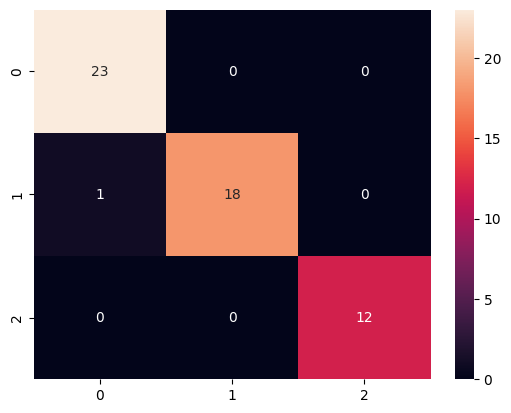

In [17]:
import seaborn as sns
import numpy as np

sns.heatmap(cf_matrix, annot=True)

<AxesSubplot: >

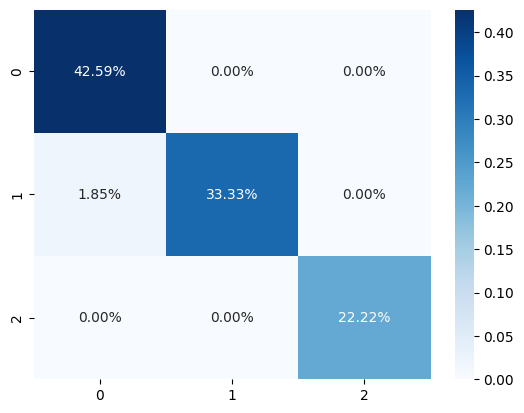

In [18]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

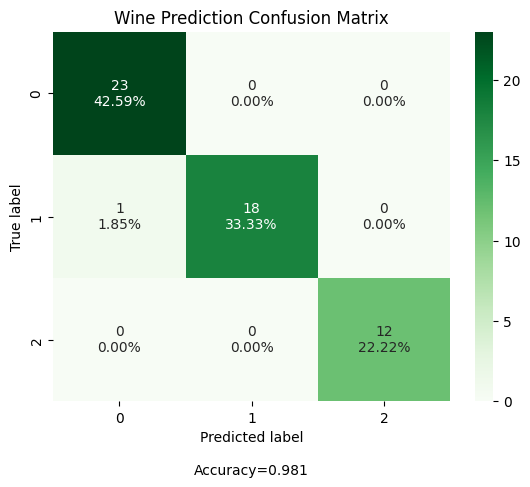

In [31]:
import sys
import os
 
# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
 
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
 
# calling make_confusion_matrix function
make_confusion_matrix(cf_matrix, cmap = 'Greens',  title='Wine Prediction Confusion Matrix')

In [20]:
help(make_confusion_matrix)

Help on function make_confusion_matrix in module confusion_matrix:

make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None)
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks

In [25]:
from sklearn.metrics import *

In [30]:
print('\nClassification Report')
print(classification_report(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

